In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms

%matplotlib inline

# Загружаем датасеты

In [78]:
df = pd.read_csv('data-sets/Global YouTube Statistics.csv', encoding='windows-1251')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aпї,12300000,9.029610e+09,Sports,Natan por Aпї,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# Подготовка данных к анализу

## Проверим типы данных

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

Как мы видим, с типами данных всё в порядке

## Общая информация по данным

In [80]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


## Проверим значения на пропуски

In [81]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

Пропусков много, поэтому заполним только то, что понадобится в анализе.

В столбцах category и channel_type пропуски можно заполнить, добавив новую категорию Other.

В столбцах created_year, created_month и created_date пропуски легко заполнить вручную, посмотрев информацию на YouTube в описании каналов

In [82]:
df['category'] = df['category'].fillna('Other')
df['channel_type'] = df['channel_type'].fillna('Other')

In [83]:
df[df['created_year'].isna()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,0,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,469,Good Mythical Morning,18300000,8.798045e+09,Entertainment,Goodmythicalmorning,0,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,509,The Game Theorists,17600000,3.752347e+09,Gaming,TheGameTheorists,0,Australia,AU,Other,...,NaN,NaN,NaN,NaN,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
735,736,LEGENDA FUNK,14500000,2.440718e+09,Music,LegendaFUNK,0,Brazil,BR,Music,...,NaN,NaN,NaN,NaN,51.3,212559417.0,12.08,183241641.0,-14.235004,-51.925280
762,763,Harry Styles,14400000,5.689224e+09,People & Blogs,harrystyles,0,United States,US,Games,...,NaN,NaN,NaN,NaN,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


In [84]:
df.at[236, 'created_year'] = 2006
df.at[236, 'created_month'] = 'Dec'
df.at[236, 'created_date'] = 20

df.at[468, 'created_year'] = 2008
df.at[468, 'created_month'] = 'Sep'
df.at[468, 'created_date'] = 17

df.at[508, 'created_year'] = 2009
df.at[508, 'created_month'] = 'Aug'
df.at[508, 'created_date'] = 22

df.at[735, 'created_year'] = 2013
df.at[735, 'created_month'] = 'May'
df.at[735, 'created_date'] = 20

df.at[762, 'created_year'] = 2017
df.at[762, 'created_month'] = 'Mar'
df.at[762, 'created_date'] = 8

In [85]:
df[df['rank'].isin([237, 469, 509, 736, 763])]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,0,NaN,NaN,Other,...,NaN,2006.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
468,469,Good Mythical Morning,18300000,8.798045e+09,Entertainment,Goodmythicalmorning,0,NaN,NaN,Other,...,NaN,2008.0,Sep,17.0,NaN,NaN,NaN,NaN,NaN,NaN
508,509,The Game Theorists,17600000,3.752347e+09,Gaming,TheGameTheorists,0,Australia,AU,Other,...,NaN,2009.0,Aug,22.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
735,736,LEGENDA FUNK,14500000,2.440718e+09,Music,LegendaFUNK,0,Brazil,BR,Music,...,NaN,2013.0,May,20.0,51.3,212559417.0,12.08,183241641.0,-14.235004,-51.925280
762,763,Harry Styles,14400000,5.689224e+09,People & Blogs,harrystyles,0,United States,US,Games,...,NaN,2017.0,Mar,8.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


Пропуски заполнены, можно приступить к анализу

# Анализ

## Распределение года создания каналов

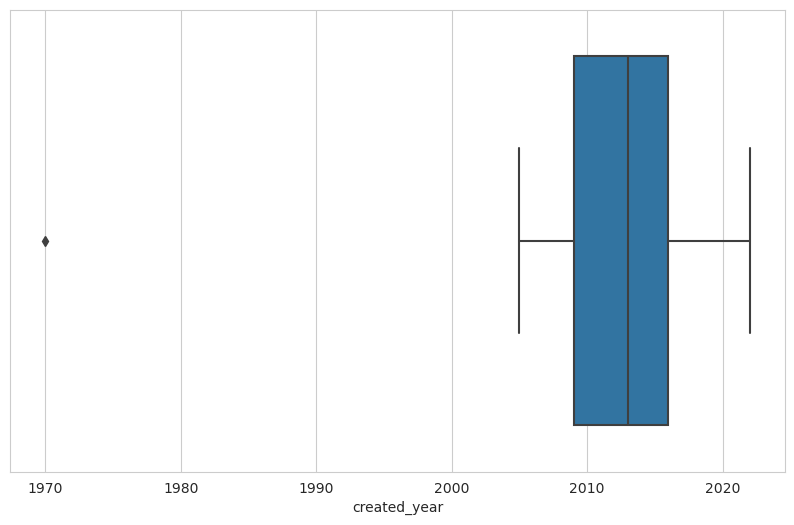

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='created_year')
plt.show()

По графику видно, что какой-то канал был создан в 1970 году, что не может быть верно, так как сам Youtube был создан в 14 февраля 2005 г. Исправим это

In [109]:
df[df['created_year'] == 1970]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


Оказалось, что это официальный канал YouTube и в описании даты создания не указано, поэтому я изменю дату на дату создания YouTube

In [112]:
df.at[101, 'created_year'] = 2005
df.at[101, 'created_month'] = 'Feb'
df.at[101, 'created_date'] = 14

df.loc[[101]]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,2005.0,Feb,14.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


Построим график рапсределения

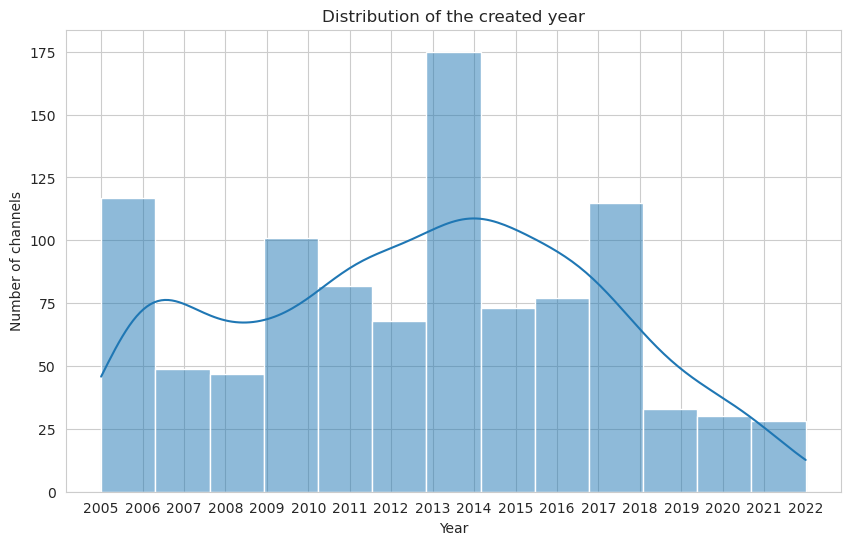

In [123]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='created_year', kde=True)
plt.xticks(range(2005, 2023))
plt.title('Distribution of the created year')
plt.xlabel('Year')
plt.ylabel('Number of channels')
plt.show()

Большинство каналов создано в 2013-2014 годах

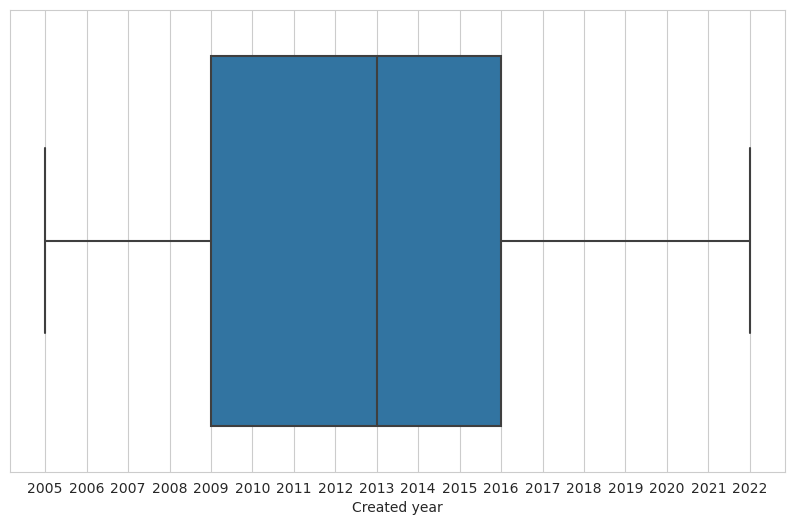

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='created_year')
plt.xticks(range(2005, 2023))
plt.xlabel('Created year')
plt.show()

По графику выше видно, что 50% каналов была создана в 2009-2016 годах.

Медиана составляет 2013 год

## Топ 10 каналов по подписчикам

In [133]:
top10_sub = df.sort_values('subscribers', ascending=False).head(10)
top10_sub['subscribers'] = top10_sub['subscribers'] / 10**6

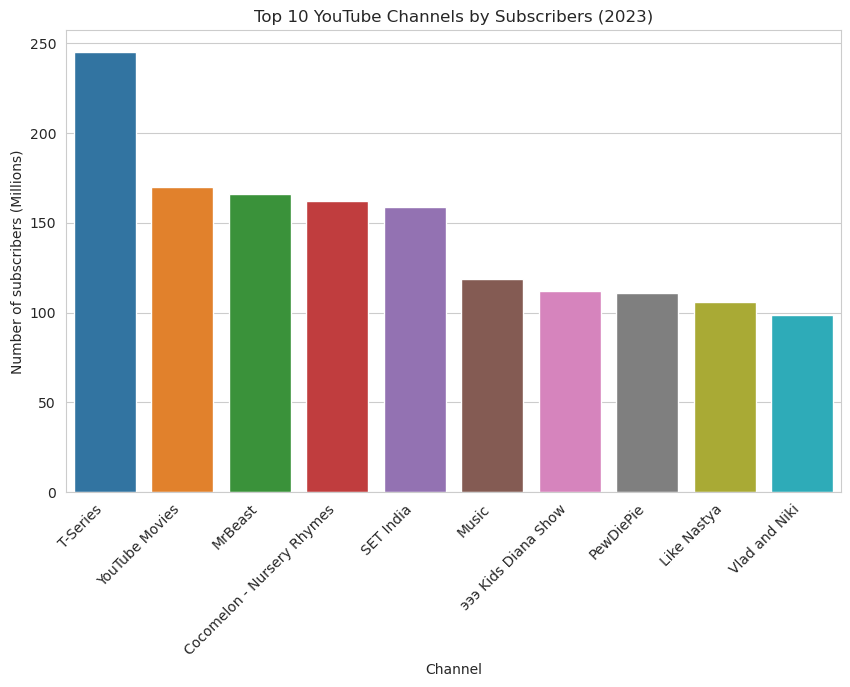

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_sub, x='Youtuber', y='subscribers')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by Subscribers (2023)')
plt.xlabel('Channel')
plt.ylabel('Number of subscribers (Millions)')
plt.show()

## Число каналов по категориям

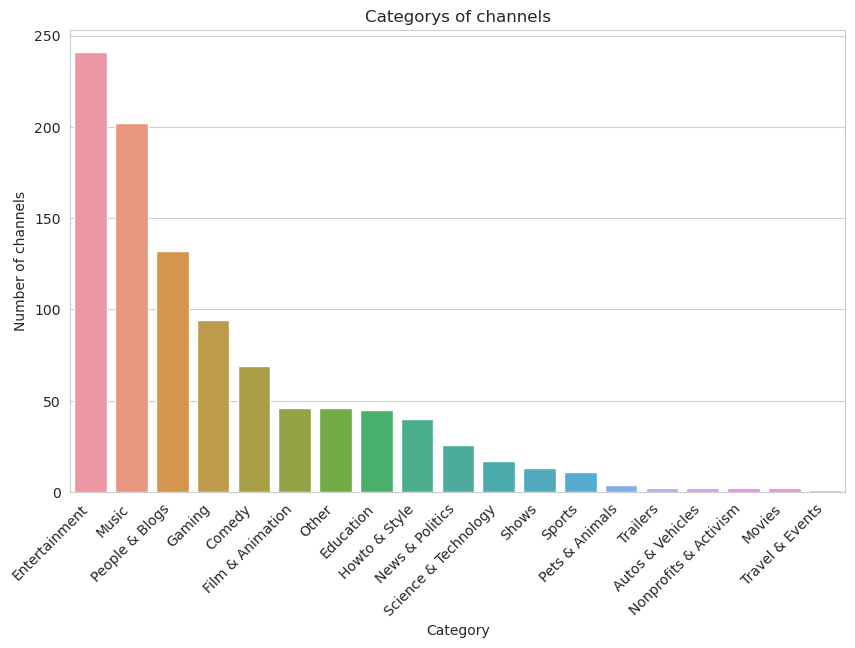

In [155]:
top_category = df.value_counts('category').to_frame().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_category, x='category', y=0)
plt.xticks(rotation=45, ha='right')
plt.title('Categorys of channels')
plt.xlabel('Category')
plt.ylabel('Number of channels')
plt.show()

## Топ 10 каналов по просмотрам

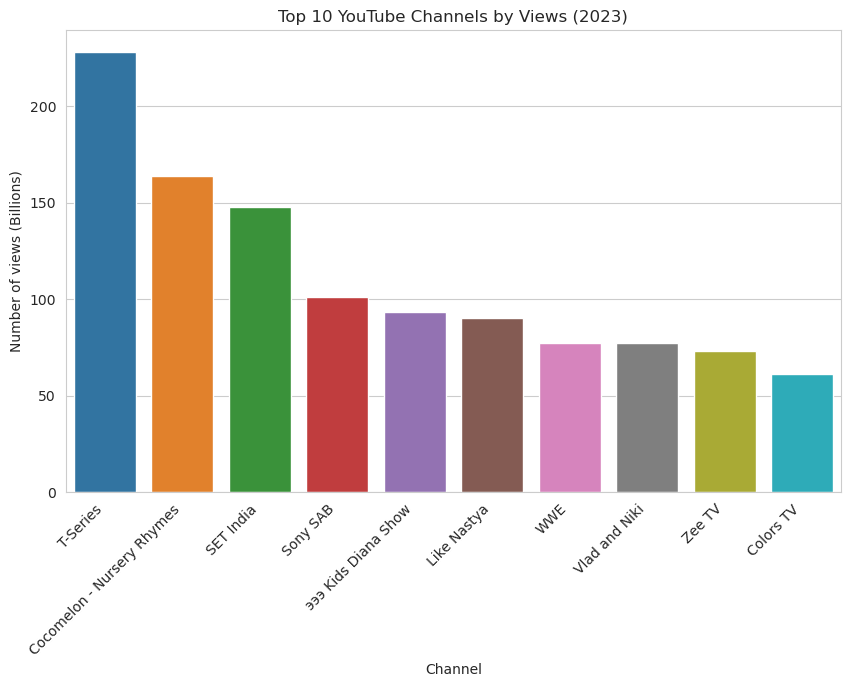

In [168]:
top10_views = df.sort_values('video views', ascending=False).head(10)
top10_views['video views'] = top10_views['video views'] / 10**9

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_views, x='Youtuber', y='video views')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by Views (2023)')
plt.xlabel('Channel')
plt.ylabel('Number of views (Billions)')
plt.show()

## Топ 10 каналов по количеству видео

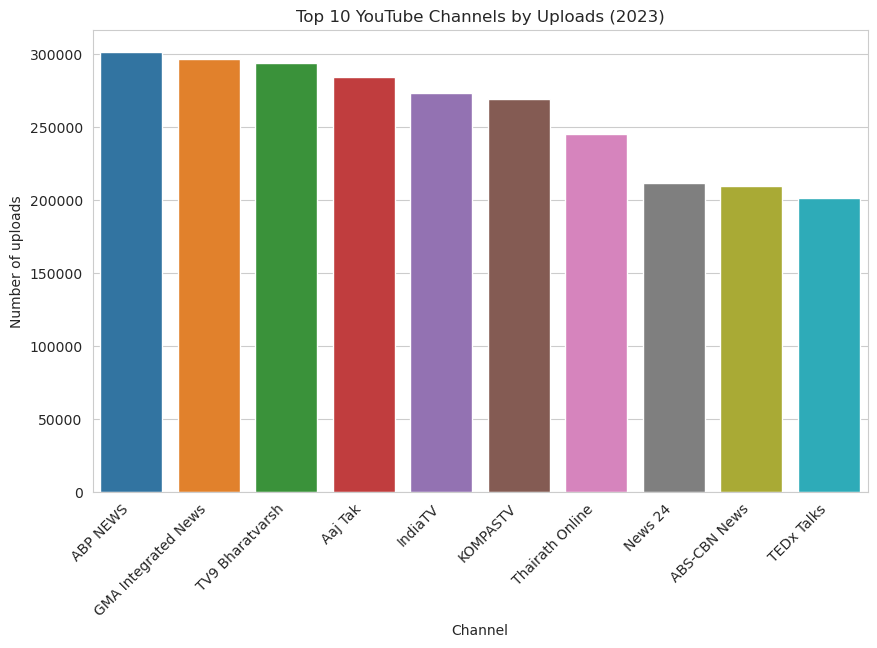

In [174]:
top10_uploads = df.sort_values('uploads', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_uploads, x='Youtuber', y='uploads')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by Uploads (2023)')
plt.xlabel('Channel')
plt.ylabel('Number of uploads')
plt.show()

## Топ 10 стран по количеству каналов

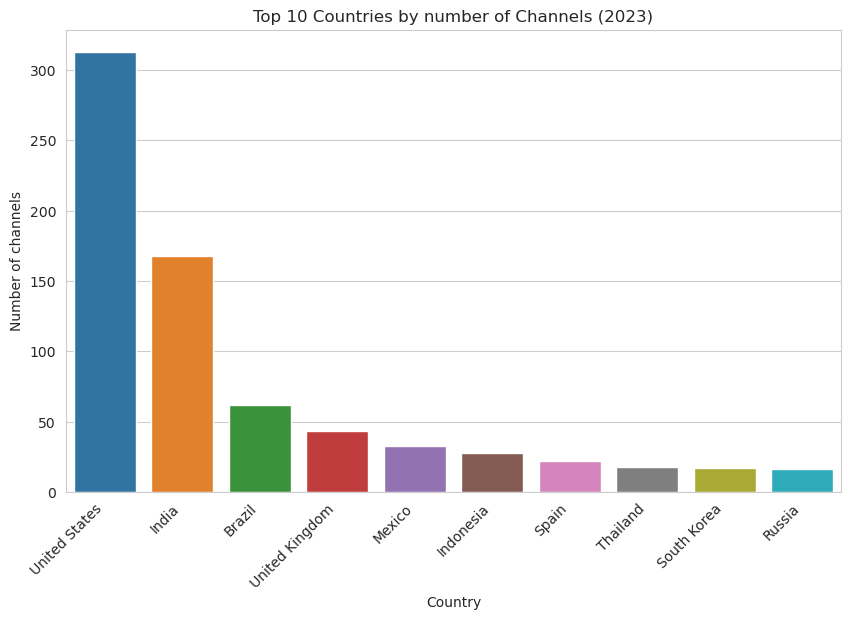

In [183]:
top10_country = df.value_counts('Country').to_frame().reset_index().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_country, x='Country', y=0)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by number of Channels (2023)')
plt.xlabel('Country')
plt.ylabel('Number of channels')
plt.show()

## Топ 10 каналов по ежемесячным доходам

В датасете даны минимальные и максимальные предполагаемые месячные доходы. Я возьму среднее по этим двум параметрам

In [248]:
df_earnings = df[['Youtuber']].copy()
df_earnings['mean_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean(axis=1) / 10**6
df_earnings

,Youtuber,mean_monthly_earnings
0,T-Series,4.782300e+00
1,YouTube Movies,2.500000e-08
2,MrBeast,2.868500e+00
3,Cocomelon - Nursery Rhymes,4.196900e+00
4,SET India,3.877950e+00
...,...,...
990,Natan por Aпї,1.169050e+00
991,Free Fire India Official,1.375500e-01
992,Panda,1.425000e-04
993,RobTopGames,8.234000e-03


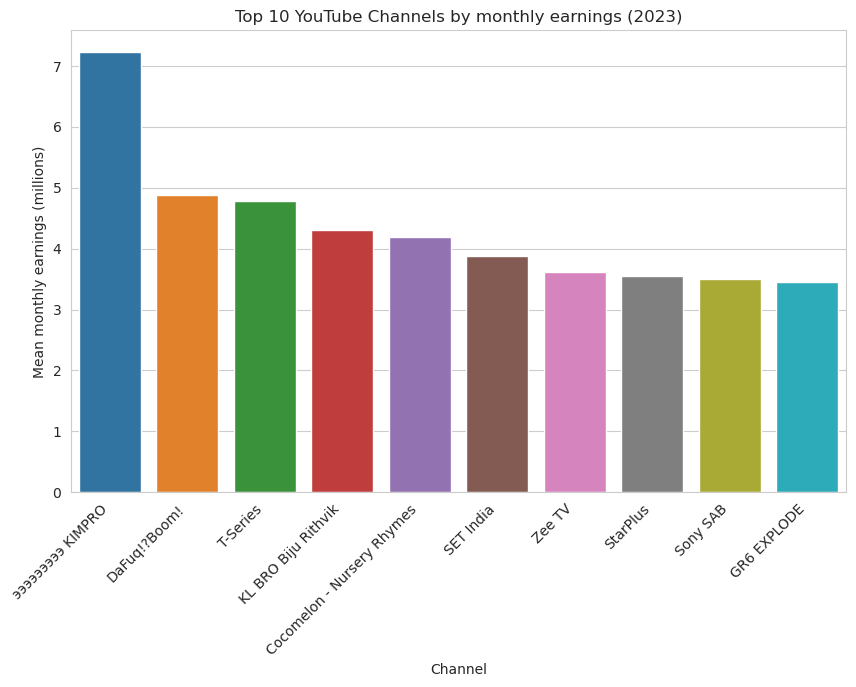

In [246]:
top10_earnings = df_earnings.sort_values('mean_monthly_earnings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_earnings, x='Youtuber', y='mean_monthly_earnings')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 YouTube Channels by monthly earnings (2023)')
plt.xlabel('Channel')
plt.ylabel('Mean monthly earnings (millions)')
plt.show()

# Корреляция

## Корреляция между безработицей и количеству каналов

In [211]:
df_country = pd.merge(df.value_counts('Country').to_frame().reset_index().rename(columns={0: 'channels'}), df[['Country', 'Unemployment rate']].drop_duplicates().dropna())
df_country.head()

,Country,channels,Unemployment rate
0,United States,313,14.70
1,India,168,5.36
2,Brazil,62,12.08
3,United Kingdom,43,3.85
4,Mexico,33,3.42


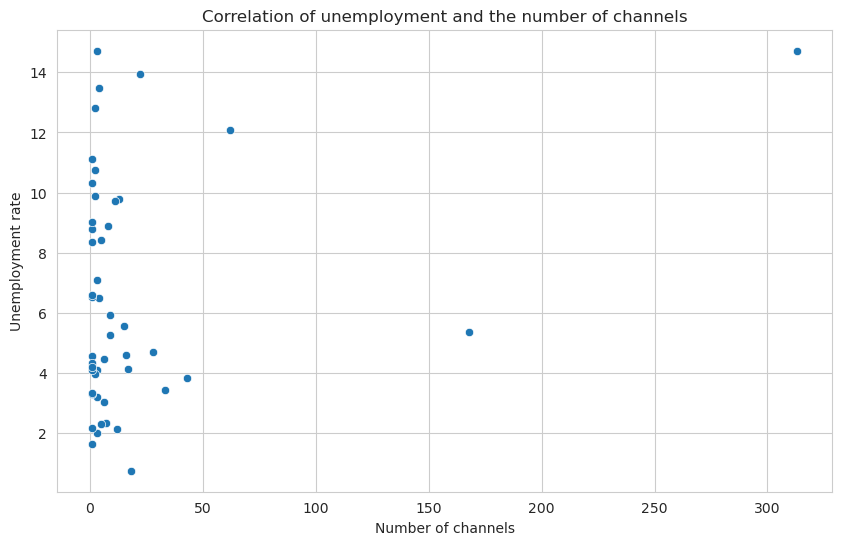

Коэффициент корреляции = 0.26649110175768115


In [222]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_country, x='channels', y='Unemployment rate')
plt.title('Correlation of unemployment and the number of channels')
plt.xlabel('Number of channels')
plt.show()

print(f'Коэффициент корреляции = {np.corrcoef(df_country["channels"], df_country["Unemployment rate"])[0, 1]}')

По графику видно, что число каналов никак не связана с уровнем безработицы. Коэффициент корреляции подтверждает это

## Корреляция между процентом высшего образования и количеству каналов

In [226]:
df_education = pd.merge(df.value_counts('Country').to_frame().reset_index().rename(columns={0: 'channels'}), df[['Country', 'Gross tertiary education enrollment (%)']].drop_duplicates().dropna())
df_education.head()

,Country,channels,Gross tertiary education enrollment (%)
0,United States,313,88.2
1,India,168,28.1
2,Brazil,62,51.3
3,United Kingdom,43,60.0
4,Mexico,33,40.2


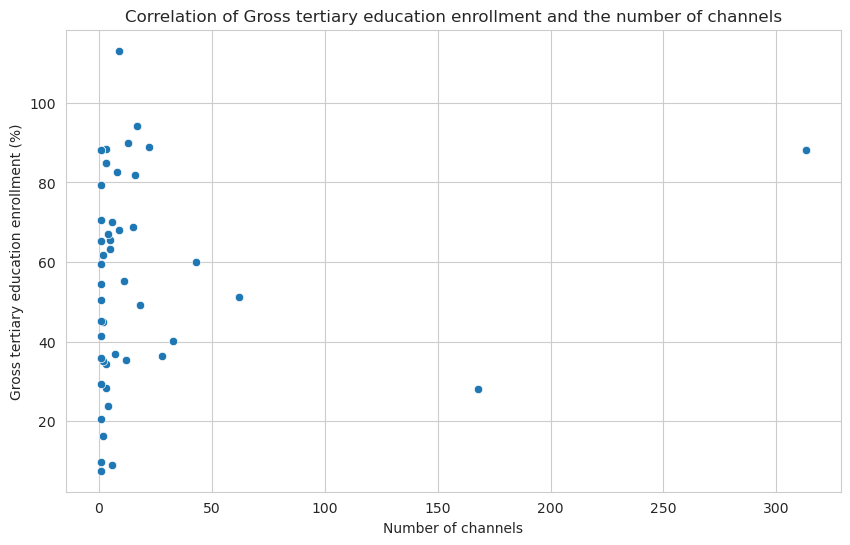

Коэффициент корреляции = 0.10572111129258185


In [227]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_education, x='channels', y='Gross tertiary education enrollment (%)')
plt.title('Correlation of Gross tertiary education enrollment and the number of channels')
plt.xlabel('Number of channels')
plt.show()

print(f'Коэффициент корреляции = {np.corrcoef(df_education["channels"], df_education["Gross tertiary education enrollment (%)"])[0, 1]}')

По графику видно, что число каналов никак не связана с уровнем высшего образования. Коэффициент корреляции подтверждает это

## Корреляция между месячным доходом и просмотрами

In [250]:
df_earnings['views'] = df['video views']
df_earnings

,Youtuber,mean_monthly_earnings,views
0,T-Series,4.782300e+00,2.280000e+11
1,YouTube Movies,2.500000e-08,0.000000e+00
2,MrBeast,2.868500e+00,2.836884e+10
3,Cocomelon - Nursery Rhymes,4.196900e+00,1.640000e+11
4,SET India,3.877950e+00,1.480000e+11
...,...,...,...
990,Natan por Aпї,1.169050e+00,9.029610e+09
991,Free Fire India Official,1.375500e-01,1.674410e+09
992,Panda,1.425000e-04,2.214684e+09
993,RobTopGames,8.234000e-03,3.741235e+08


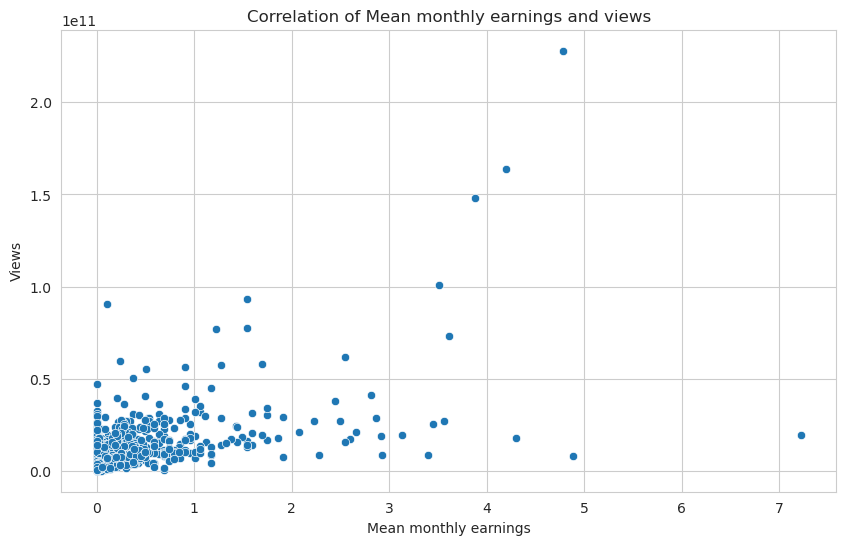

Коэффициент корреляции = 0.5514942015311236


In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_earnings, x='mean_monthly_earnings', y='views')
plt.title('Correlation of Mean monthly earnings and views')
plt.xlabel('Mean monthly earnings')
plt.ylabel('Views')
plt.show()

print(f'Коэффициент корреляции = {np.corrcoef(df_earnings["mean_monthly_earnings"], df_earnings["views"])[0, 1]}')

## Корреляция между месячным доходом и подписчиками

In [252]:
df_earnings['subs'] = df['subscribers']
df_earnings

,Youtuber,mean_monthly_earnings,views,subs
0,T-Series,4.782300e+00,2.280000e+11,245000000
1,YouTube Movies,2.500000e-08,0.000000e+00,170000000
2,MrBeast,2.868500e+00,2.836884e+10,166000000
3,Cocomelon - Nursery Rhymes,4.196900e+00,1.640000e+11,162000000
4,SET India,3.877950e+00,1.480000e+11,159000000
...,...,...,...,...
990,Natan por Aпї,1.169050e+00,9.029610e+09,12300000
991,Free Fire India Official,1.375500e-01,1.674410e+09,12300000
992,Panda,1.425000e-04,2.214684e+09,12300000
993,RobTopGames,8.234000e-03,3.741235e+08,12300000


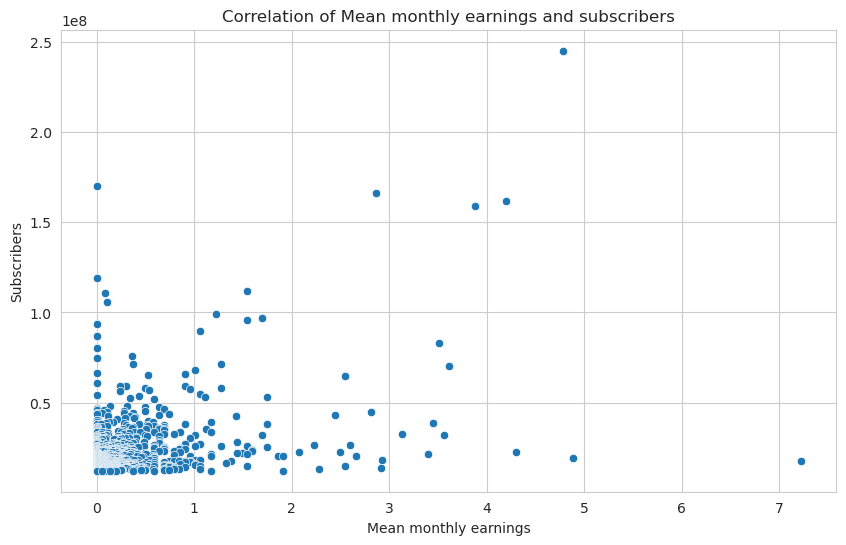

Коэффициент корреляции = 0.3886010797326703


In [254]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_earnings, x='mean_monthly_earnings', y='subs')
plt.title('Correlation of Mean monthly earnings and subscribers')
plt.xlabel('Mean monthly earnings')
plt.ylabel('Subscribers')
plt.show()

print(f'Коэффициент корреляции = {np.corrcoef(df_earnings["mean_monthly_earnings"], df_earnings["subs"])[0, 1]}')

Учитывая два верхних графика, можно сделать вывод, что на месячный доход влияют просмотры и делают это сильнее, чем количество подписчиков.

## Корреляция между количеством просмотров и количеством подписчиков

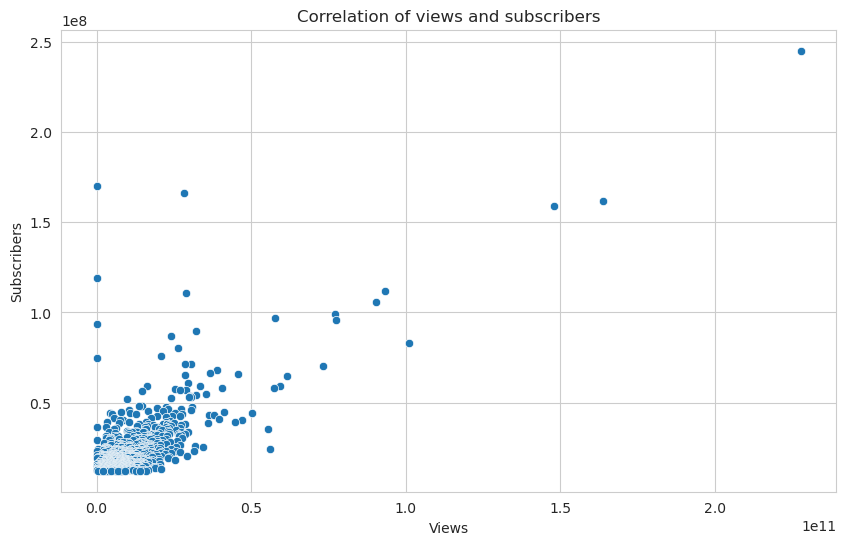

Коэффициент корреляции = 0.7509576173780218


In [257]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_earnings, x='views', y='subs')
plt.title('Correlation of views and subscribers')
plt.xlabel('Views')
plt.ylabel('Subscribers')
plt.show()

print(f'Коэффициент корреляции = {np.corrcoef(df_earnings["views"], df_earnings["subs"])[0, 1]}')

По графику и коэффициенту корреляции видно, что просмотры и подписчики имеют достаточную положительную корреляцию

## Общая корреляция параметров

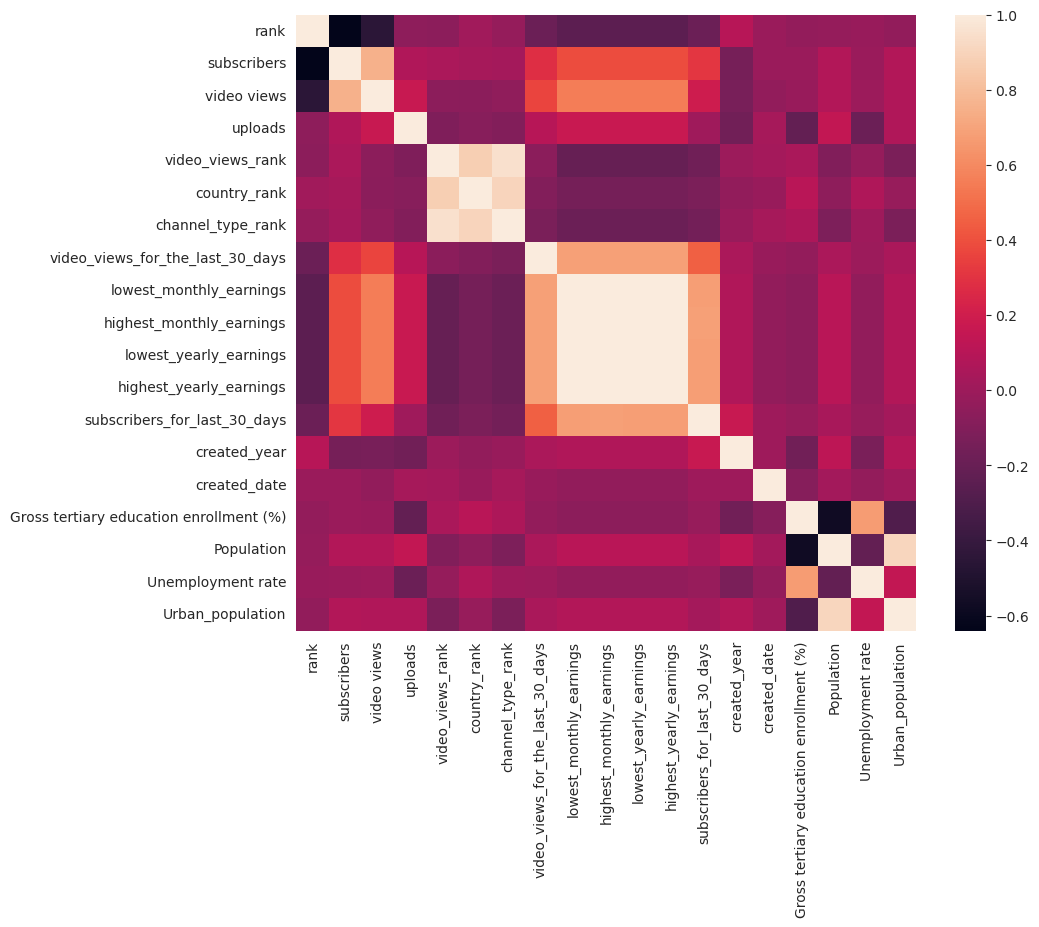

In [266]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-2].corr(numeric_only=True))
plt.show()

# Вывод

В данном проекте построены графики сравнения и корреляции основных параметров.
Анализ данных и графиков позволяет сделать следующие выводы:

* Корреляция между средним месячным доходом и количеством подписчиков: По графику и коэффициенту корреляции видно, что средний месячный доход и количество подписчиков имеют положительную корреляцию. Это говорит о том, что увеличение количества подписчиков может иметь положительное влияние на доход.

* Корреляция между количеством просмотров и количеством подписчиков: График и коэффициент корреляции также указывают на положительную корреляцию между количеством просмотров и количеством подписчиков. Это означает, что увеличение количества просмотров может способствовать увеличению числа подписчиков.

* Общая корреляция параметров: Тепловая карта корреляции между всеми числовыми параметрами позволяет увидеть, как различные параметры взаимосвязаны. Например, можно заметить, что средний месячный доход и количество просмотров имеют некоторую корреляцию, что может свидетельствовать о том, что успешные каналы с высокими доходами также имеют большое количество просмотров и наоборот.

В целом, анализ данных показывает, что успех YouTube-каналов связан с количеством подписчиков и просмотров, а увеличение этих параметров может положительно сказаться на доходе.